In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from collections import Counter

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


Propertycrime = α + Population + Population2 + Murder + Robbery

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [2]:
df = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', header=4,)

df
display(df.columns)

data= pd.DataFrame(df) 

needed_data = data.loc[:, ['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
needed_data.columns = ['Population', 'Murder', 'Robbery']

needed_data = needed_data.dropna()

needed_data.Robbery = needed_data.Robbery.where(needed_data.Robbery == 0, 1)
needed_data.Murder = needed_data.Murder.where(needed_data.Murder == 0, 1)

needed_data["population2"] = needed_data["Population"]**2

#removing any outliers
needed_data = needed_data[np.abs(needed_data.Population-needed_data.Population.mean())<=(2*needed_data.Population.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

needed_data.head(10)

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

,Population,Murder,Robbery,population2
0,1861.000,0.000,0.000,3463321.000
1,2577.000,0.000,0.000,6640929.000
2,2846.000,0.000,0.000,8099716.000
3,97956.000,1.000,1.000,9595377936.000
4,6388.000,0.000,1.000,40806544.000
5,4089.000,0.000,1.000,16719921.000
6,1781.000,0.000,0.000,3171961.000
7,118296.000,1.000,1.000,13993943616.000
8,9519.000,0.000,1.000,90611361.000
9,18182.000,0.000,1.000,330585124.000


In [3]:
needed_data.describe()

,Population,Murder,Robbery,population2
count,347.000,347.000,347.000,347.000
mean,15956.686,0.138,0.599,985840709.758
std,27080.219,0.346,0.491,5067232380.434
min,526.000,0.000,0.000,276676.000
25%,2997.000,0.000,0.000,8982153.000
50%,7187.000,0.000,1.000,51652969.000
75%,18160.500,0.000,1.000,329804222.500
max,258789.000,1.000,1.000,66971746521.000


In [4]:
needed_data['Population'].max()

258789.0

In [5]:
df.loc[needed_data['Population'].idxmax()]

City                                        Buffalo
Population                               258789.000
Violent\ncrime                             3249.000
Murder and\nnonnegligent\nmanslaughter       47.000
Rape\n(revised\ndefinition)1                    NaN
Rape\n(legacy\ndefinition)2                 145.000
Robbery                                    1322.000
Aggravated\nassault                        1735.000
Property\ncrime                           12491.000
Burglary                                   3458.000
Larceny-\ntheft                            8076.000
Motor\nvehicle\ntheft                       957.000
Arson3                                          NaN
Name: 35, dtype: object

In [6]:
#find a way to find row of max value

needed_data.iloc[216,:]

Population        3324.000
Murder               0.000
Robbery              0.000
population2   11048976.000
Name: 217, dtype: float64

In [7]:
#needed_data.index(max("Population"))\

A = np.array(needed_data) 
np.where(A==max(needed_data["Population"]))

(array([35], dtype=int64), array([0], dtype=int64))

In [8]:
df.loc[needed_data['Population'].idxmin()]

City                                      Glen Park Village
Population                                          526.000
Violent\ncrime                                        0.000
Murder and\nnonnegligent\nmanslaughter                0.000
Rape\n(revised\ndefinition)1                            NaN
Rape\n(legacy\ndefinition)2                           0.000
Robbery                                               0.000
Aggravated\nassault                                   0.000
Property\ncrime                                       5.000
Burglary                                              0.000
Larceny-\ntheft                                       5.000
Motor\nvehicle\ntheft                                 0.000
Arson3                                                0.000
Name: 118, dtype: object

In [9]:
#Work through this

#idx = max(range(len(a)), key = lambda i: a[i])



In [10]:
needed_data.Murder

0     0.000
1     0.000
2     0.000
3     1.000
4     0.000
5     0.000
6     0.000
7     1.000
8     0.000
9     0.000
10    0.000
11    0.000
12    0.000
13    0.000
14    1.000
15    0.000
16    0.000
17    0.000
18    0.000
19    0.000
20    0.000
21    0.000
22    1.000
23    0.000
24    0.000
25    0.000
26    0.000
27    0.000
28    0.000
29    0.000
       ... 
318   0.000
319   0.000
320   0.000
321   1.000
322   0.000
323   1.000
324   0.000
325   0.000
326   0.000
327   0.000
328   0.000
329   0.000
330   0.000
331   1.000
332   0.000
333   0.000
334   0.000
335   0.000
336   0.000
337   0.000
338   1.000
339   0.000
340   1.000
341   0.000
342   0.000
343   0.000
344   0.000
345   0.000
346   1.000
347   0.000
Name: Murder, Length: 347, dtype: float64

In [11]:
needed_data.Population

0       1861.000
1       2577.000
2       2846.000
3      97956.000
4       6388.000
5       4089.000
6       1781.000
7     118296.000
8       9519.000
9      18182.000
10      2053.000
11      4523.000
12       658.000
13      2522.000
14     27270.000
15      3333.000
16      7473.000
17      5418.000
18     15374.000
19      5733.000
20     17627.000
21     34243.000
22     46304.000
23      1410.000
24     12001.000
25      1022.000
26      2325.000
27      2054.000
28      2065.000
29      2358.000
         ...    
318     3642.000
319      615.000
320    12195.000
321    61686.000
322    27980.000
323     6887.000
324    27940.000
325     3012.000
326     3453.000
327     5828.000
328     8392.000
329     5175.000
330    28179.000
331    10245.000
332     1862.000
333     4337.000
334    43777.000
335     1797.000
336     4574.000
337     1732.000
338    44821.000
339     2604.000
340    57559.000
341     3733.000
342     9141.000
343    10685.000
344      829.000
345     5931.0

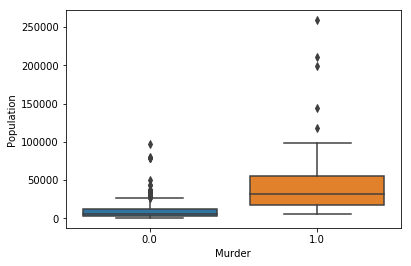

In [12]:
sns.boxplot(
    needed_data.Murder,
    needed_data.Population,
)
plt.xlabel('Murder')
plt.ylabel('Population')
plt.show()

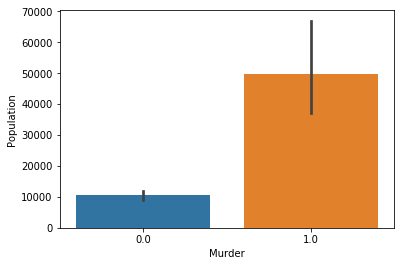

In [13]:
sns.barplot(x='Murder', y='Population', data=needed_data)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Arson'